In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.keras.backend.set_floatx('float32') # default is set to float64

model = keras.Sequential([
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PATH="C:/Users/manoj/PycharmProjects/data/PlantPathology2020"

train_dir = os.path.join(PATH, '150X200')
#train_dir = os.path.join(PATH, 'images')
validation_dir = os.path.join(PATH, '150X200')
#validation_dir = os.path.join(PATH, 'images')


In [5]:
np.random.seed(25)

In [6]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 133
IMG_WIDTH = 200

In [7]:
import pandas as pd
import numpy as np

In [8]:
dataPath='c:/Users/manoj/PycharmProjects/data/PlantPathology2020/'
trainImagesDf=pd.read_csv(dataPath+'/train.csv')

In [9]:
trainImagesDf

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [10]:
trainImagesDf["filename"]=trainImagesDf["image_id"]+".jpg"

In [11]:
x=np.asarray(trainImagesDf[["healthy","multiple_diseases","rust","scab"]])
options = { 0:"healthy"
           ,1:"multiple_diseases"
           ,2:"rust"
           ,3:"scab"
}
trainImagesDf["label"]=[options[np.argmax(arr)] for arr in x]
trainImagesDf["name"] = trainImagesDf["image_id"]+'.jpg'
#testImagesDf
#train_df = trainImagesDf[["image_id","label"]]
df = trainImagesDf[["name","label"]]
df.rename(columns={"name":"filename","label":"class"}, inplace=True)

C:\Users\manoj\anaconda3\envs\fastai\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df["class"]

0                    scab
1       multiple_diseases
2                 healthy
3                    rust
4                 healthy
              ...        
1816                 scab
1817              healthy
1818              healthy
1819                 rust
1820                 scab
Name: class, Length: 1821, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["class"]), df.drop(columns=["filename"]), test_size=0.2)

In [14]:
train_df=X_train
train_df["class"]=y_train
validation_df=X_test
validation_df["class"]=y_test
validation_df

,filename,class
778,Train_778.jpg,rust
1232,Train_1232.jpg,scab
1260,Train_1260.jpg,rust
1085,Train_1085.jpg,healthy
365,Train_365.jpg,healthy
...,...,...
1274,Train_1274.jpg,scab
1802,Train_1802.jpg,rust
808,Train_808.jpg,scab
968,Train_968.jpg,healthy


In [15]:
total_train = len(train_df)
total_val   = len(validation_df)

In [16]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [17]:
train_data_gen = train_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=train_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1456 validated image filenames belonging to 4 classes.


In [18]:
val_data_gen = validation_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=validation_df,
                                                            directory=validation_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 365 validated image filenames belonging to 4 classes.


In [19]:
testImagesDf=pd.read_csv(dataPath+'/test.csv')
testImagesDf

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [20]:
sample_training_images, _ = next(train_data_gen)

In [21]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

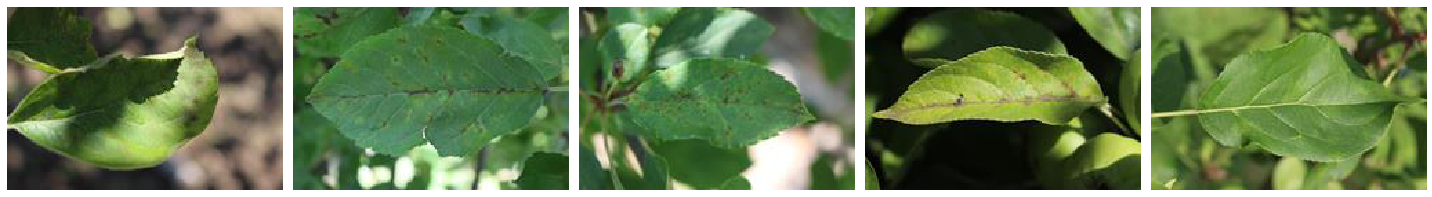

In [22]:
plotImages(sample_training_images[:5])

In [23]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 133, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 100, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 100, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [26]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/15
11/11 [==============================] - 3s 316ms/step - loss: 0.5896 - accuracy: 0.7498 - val_loss: 0.5141 - val_accuracy: 0.7500
Epoch 2/15
11/11 [==============================] - 1s 97ms/step - loss: 0.5207 - accuracy: 0.7500 - val_loss: 0.4915 - val_accuracy: 0.7500
Epoch 3/15
11/11 [==============================] - 1s 100ms/step - loss: 0.5144 - accuracy: 0.7500 - val_loss: 0.4863 - val_accuracy: 0.7500
Epoch 4/15
11/11 [==============================] - 1s 97ms/step - loss: 0.4917 - accuracy: 0.7528 - val_loss: 0.4771 - val_accuracy: 0.7529
Epoch 5/15
11/11 [==============================] - 1s 97ms/step - loss: 0.4721 - accuracy: 0.7596 - val_loss: 0.4675 - val_accuracy: 0.7510
Epoch 6/15
11/11 [==============================] - 1s 97ms/step - loss: 0.4506 - accuracy: 0.7652 - val_loss: 0.4547 - val_ac

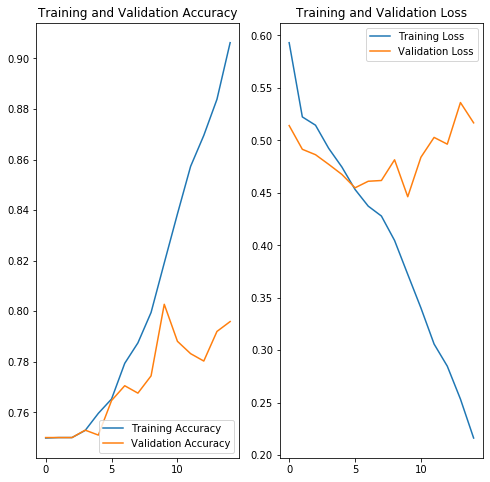

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [102]:
train_image_generator = validation_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [103]:
#train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [104]:
train_data_gen = train_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=train_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1456 validated image filenames belonging to 4 classes.


In [105]:
val_data_gen = validation_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=validation_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col="class",
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 365 validated image filenames belonging to 4 classes.


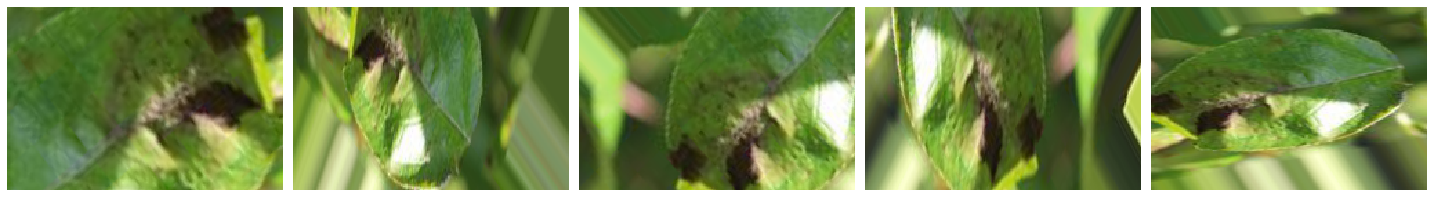

In [39]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [43]:
model_new = Sequential([
    Conv2D(64, kernel_size = (7,7), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))
    , BatchNormalization()
    , MaxPooling2D(pool_size=(2,2))
    , Dropout(0.25)
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , BatchNormalization()
    , MaxPooling2D()
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , BatchNormalization()
    , MaxPooling2D(pool_size=(2,2), strides=(2,2))
    , Dropout(0.25)
    , Flatten()
    , Dense(512, activation='relu')
    , Dense(4, activation = "softmax")
])


In [44]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 133, 200, 64)      9472      
_________________________________________________________________
batch_normalization_6 (Batch (None, 133, 200, 64)      256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 66, 100, 64)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 66, 100, 64)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 66, 100, 64)       102464    
_________________________________________________________________
batch_normalization_7 (Batch (None, 66, 100, 64)       256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 33, 50, 64)       

In [106]:
model = Sequential([
    Conv2D(64, kernel_size = (7,7), strides=2, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))
    , BatchNormalization()
    , MaxPooling2D(pool_size=(3, 3), strides=2, padding="same")
    #, Dropout(0.25)
# filter_num=64
# stride=2
    , Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding="same")
    , BatchNormalization()
    , Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    
    , Conv2D(filters=64, kernel_size=(1, 1), strides=2)
    , BatchNormalization()
    #stride=1 X 2  
    , Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    
    , Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
#filter_num=128
#stride=2
    , Conv2D(filters=128, kernel_size=(3, 3), strides=stride, padding="same")
    , BatchNormalization()
    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=128, kernel_size=(1, 1), strides=stride)
    , BatchNormalization()

    #stride=1 X 3
    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    
#filter_num=256
#stride=2
    , Conv2D(filters=256, kernel_size=(3, 3), strides=stride, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=256, kernel_size=(1, 1), strides=stride)
    , BatchNormalization()

    #stride=1 X 5
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization() 

    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()    

    
#filter_num=512
#stride=2
    , Conv2D(filters=512, kernel_size=(3, 3), strides=stride, padding="same")
    , BatchNormalization()
    , Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=512, kernel_size=(1, 1), strides=stride)
    , BatchNormalization()

    #stride=1 X 2
    , Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

    , Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()
    , Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")
    , BatchNormalization()

##
    , tf.keras.layers.GlobalAveragePooling2D()
    , tf.keras.layers.Dense(units=NUM_CLASSES, activation=tf.keras.activations.softmax)


    #, Flatten()
    #, Dense(4, activation = "softmax")
])

'''
model_new = tf.keras.Sequential()


filter_num=64
stride=2
#model.add(BasicBlock(filter_num=64, stride=2))

stride=1

filter_num=128
stride=2

stride=1


filter_num=256
stride=2

stride=1


filter_num=512
stride=2
#model.add(BasicBlock(filter_num=512, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())
stride=1
for i in range (1,3):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.GlobalAveragePooling2D())    
model.add(tf.keras.layers.Dense(units=NUM_CLASSES, activation=tf.keras.activations.softmax))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
'''
print()
model.compile(#optimizer='adam',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              
                  #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                  #BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

#model.summary()

In [107]:
epochs=20
#history = model_new.fit_generator(
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    #epochs=30,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/20
11/11 [==============================] - 8s 724ms/step - loss: 1.3333 - accuracy: 0.3870 - val_loss: 1.3740 - val_accuracy: 0.3320
Epoch 2/20
11/11 [==============================] - 6s 506ms/step - loss: 1.3003 - accuracy: 0.4179 - val_loss: 1.3517 - val_accuracy: 0.3320
Epoch 3/20
11/11 [==============================] - 6s 520ms/step - loss: 1.2875 - accuracy: 0.4300 - val_loss: 1.3370 - val_accuracy: 0.3281
Epoch 4/20
11/11 [==============================] - 6s 529ms/step - loss: 1.2893 - accuracy: 0.4367 - val_loss: 1.3416 - val_accuracy: 0.4102
Epoch 5/20
11/11 [==============================] - 6s 524ms/step - loss: 1.2762 - accuracy: 0.4488 - val_loss: 1.3473 - val_accuracy: 0.3320
Epoch 6/20
11/11 [==============================] - 6s 513ms/step - loss: 1.2874 - accuracy: 0.4315 - val_loss: 1.3578 - val_accuracy: 0.3711
Epoch 7/20
11/11 [==============================] - 6s 52

In [96]:
history

In [47]:
epochs=20
#history = model_new.fit_generator(
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    #epochs=30,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/20
11/11 [==============================] - 6s 573ms/step - loss: 0.7734 - accuracy: 0.6525 - val_loss: 0.7630 - val_accuracy: 0.6699
Epoch 2/20
11/11 [==============================] - 6s 571ms/step - loss: 0.7673 - accuracy: 0.6611 - val_loss: 0.7671 - val_accuracy: 0.6621
Epoch 3/20
11/11 [==============================] - 6s 580ms/step - loss: 0.7694 - accuracy: 0.6562 - val_loss: 0.7681 - val_accuracy: 0.6602
Epoch 4/20
11/11 [==============================] - 7s 602ms/step - loss: 0.7666 - accuracy: 0.6604 - val_loss: 0.7681 - val_accuracy: 0.6602
Epoch 5/20
11/11 [==============================] - 6s 574ms/step - loss: 0.7640 - accuracy: 0.6679 - val_loss: 0.7681 - val_accuracy: 0.6602
Epoch 6/20
11/11 [==============================] - 6s 582ms/step - loss: 0.7648 - accuracy: 0.6638 - val_loss: 0.7681 - val_accuracy: 0.6602
Epoch 7/20
11/11 [==============================] - 7s 59

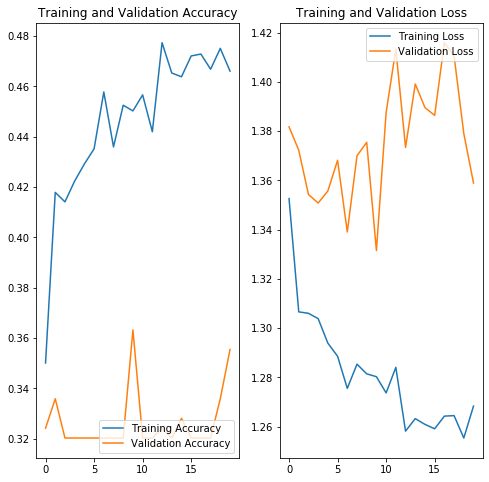

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
test_df=pd.read_csv(dataPath+'/test.csv')
test_df
test_df.rename(columns={"image_id":"filename"}, inplace=True)
test_df["filename"]=test_df["filename"]+".jpg"
test_df

,filename
0,Test_0.jpg
1,Test_1.jpg
2,Test_2.jpg
3,Test_3.jpg
4,Test_4.jpg
...,...
1816,Test_1816.jpg
1817,Test_1817.jpg
1818,Test_1818.jpg
1819,Test_1819.jpg


In [121]:
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our testing data

test_data_gen = test_image_generator.flow_from_dataframe( batch_size=batch_size,
                                                            dataframe=test_df,
                                                            directory=train_dir,
                                                            x_col="filename",
                                                            y_col=None,
                                                            class_mode=None,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH) #, class_mode='binary'
                                                          )

Found 1821 validated image filenames.


In [143]:
predDf = model.predict(test_data_gen)

In [144]:
import os

predDf=pd.DataFrame(predDf)
predDf.rename(columns=options, inplace=True)
predDf["image_id"]=[os.path.basename(os.path.splitext(i)[0]) for i in test_data_gen.filepaths]
    
#options
submissionDf=predDf[["image_id","healthy","multiple_diseases","rust","scab"]]

In [146]:
submissionDf.to_csv("submission.202004231630.csv",index=False)

In [ ]:
layer_params=[3, 4, 6, 3]

def make_basic_block_layer(filter_num, blocks, stride=1):
    res_block = tf.keras.Sequential()
    res_block.add(BasicBlock(filter_num, stride=stride))

    for _ in range(1, blocks):
        res_block.add(BasicBlock(filter_num, stride=1))

    return res_block

In [72]:
conv1  = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding="same", input_shape = (28,28,1))
bn1    = tf.keras.layers.BatchNormalization()
pool1  = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="same")


In [ ]:
layer1 = make_basic_block_layer(filter_num= 64, blocks=3)
layer2 = make_basic_block_layer(filter_num=128, blocks=4, stride=2)
layer3 = make_basic_block_layer(filter_num=256, blocks=6, stride=2)
layer4 = make_basic_block_layer(filter_num=512, blocks=3, stride=2)


In [ ]:
    def __init__(self, filter_num, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same")
        self.bn1   = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same")
        self.bn2   = tf.keras.layers.BatchNormalization()
        if stride != 1:
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
            self.downsample.add(tf.keras.layers.BatchNormalization())
        else:
            self.downsample = lambda x: x

In [37]:
y=lambda x:x

In [38]:
y(2)

2

In [33]:
for _ in range(1, 3):
    print(_)

1
2


In [50]:
NUM_CLASSES=4

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2, padding="same"
                                 ,  input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="same"))

'''
filter_num=64
stride=2
#model.add(BasicBlock(filter_num=64, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())

stride=1
for i in range (1,3):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    

filter_num=128
stride=2
#model.add(BasicBlock(filter_num=128, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())

stride=1
for i in range (1,4):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

filter_num=256
stride=2
#model.add(BasicBlock(filter_num=256, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())
stride=1
for i in range (1,6):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())

filter_num=512
stride=2
#model.add(BasicBlock(filter_num=512, stride=2))
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(1, 1), strides=stride))
model.add(tf.keras.layers.BatchNormalization())
stride=1
for i in range (1,3):
    #model.add(BasicBlock(filter_num, stride=1))
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=stride, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters=filter_num, kernel_size=(3, 3), strides=1, padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
'''
model.add(tf.keras.layers.GlobalAveragePooling2D())    
model.add(tf.keras.layers.Dense(units=NUM_CLASSES, activation=tf.keras.activations.softmax))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [57]:
epochs=5
#history = model_new.fit_generator(
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    #epochs=30,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 2 steps
Epoch 1/5
 1/11 [=>............................] - ETA: 7s

InvalidArgumentError:  Can not squeeze dim[1], expected a dimension of 1, got 4
	 [[node metrics/accuracy/Squeeze (defined at <ipython-input-57-e2c8f17c0cf7>:9) ]] [Op:__inference_distributed_function_35153]

Function call stack:
distributed_function


In [80]:
import tensorflow.keras as keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
#model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)        

In [52]:
import tensorflow as tf


class BasicBlock(tf.keras.layers.Layer):

    def __init__(self, filter_num, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=stride,
                                            padding="same")
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=1,
                                            padding="same")
        self.bn2 = tf.keras.layers.BatchNormalization()
        if stride != 1:
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters=filter_num,
                                                       kernel_size=(1, 1),
                                                       strides=stride))
            self.downsample.add(tf.keras.layers.BatchNormalization())
        else:
            self.downsample = lambda x: x

    def call(self, inputs, training=None, **kwargs):
        residual = self.downsample(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        output = tf.nn.relu(tf.keras.layers.add([residual, x]))

        return output

In [10]:
model = Sequential([
    Conv2D(64, kernel_size = (7,7), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3))
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D(pool_size=(2,2))
    , Dropout(0.4)
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D()
    , Conv2D(64, kernel_size = (5,5), padding='same', activation='relu')
    , tf.keras.layers.BatchNormalization()
    , MaxPooling2D(pool_size=(2,2), strides=(2,2))
    , Dropout(0.4)
    , Flatten()
    , Dense(512, activation='relu')
    , Dense(4, activation = "softmax")
])


model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 64)      9472      
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      102464    
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)       

In [5]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
_________________________________________________________

In [71]:
model=tf.keras.Sequential()

import tensorflow.keras as keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

#model.add(BasicBlock(filter_num=256, stride=2))

model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)        

In [108]:
print(tf.__version__)

2.1.0


In [109]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = dataPath+'/images/Train_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n07753113', 'fig', 0.27246532), ('n02219486', 'ant', 0.17165287), ('n01644373', 'tree_frog', 0.12319061)]


In [111]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

InceptionV3